<a href="https://colab.research.google.com/github/wcjb/Deep-learn/blob/master/%E8%A1%B0%E5%87%8F%E5%9E%8B%E5%AD%A6%E4%B9%A0%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**构建一个5层神经网络拟合一个非线性函数，并使用衰减型学习率进行训练。**

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import scale

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [0]:
dataset_size=10000
noise = np.random.RandomState(1).rand(dataset_size)
X = np.linspace(-100,100,dataset_size)
Y = X*np.sin(X)+noise

x = scale(X)
y = scale(Y)

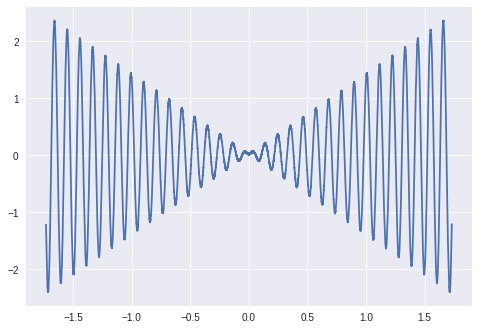

In [0]:
plt.plot(x,y)

In [0]:
xinput = tf.placeholder(tf.float32,shape=(None,10000),name='x-input')
yinput = tf.placeholder(tf.float32,shape=(None,10000),name='y-input')

w1 = tf.Variable(tf.random_normal([10000,800],stddev=2,seed=1),trainable=True)
b1 = tf.Variable(tf.random_normal([1,800],stddev=2,seed=1),trainable=True)
y1_out = tf.nn.sigmoid(tf.matmul(xinput,w1)+b1)

w2 = tf.Variable(tf.random_normal([800,400],stddev=2,seed=1),trainable=True)
b2 = tf.Variable(tf.random_normal([1,400],stddev=2,seed=1),trainable=True)
y2_out = tf.nn.sigmoid(tf.matmul(y1_out,w2)+b2)

w3 = tf.Variable(tf.random_normal([400,10000],stddev=2,seed=1),trainable=True)
b3 = tf.Variable(tf.random_normal([1,10000],stddev=2,seed=1),trainable=True)
y3_out = tf.nn.sigmoid(tf.matmul(y2_out,w3)+b3)

In [0]:
global_step = tf.Variable(0)
# 采用最小均方误差（MSE）做代价函数
loss = tf.reduce_mean(tf.square(yinput-y3_out))
# 采用指数平滑下降的学习率staircase=True，采用阶梯型下降，即每隔dataset_size/batch_size更新一次学习率
learning_rate = tf.train.exponential_decay(0.1,global_step,10,0.99,staircase=True)
# 使用梯度下降法对MSE进行求解
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)

In [0]:
config = tf.ConfigProto(allow_soft_placement=True,log_device_placement=False)
init = tf.global_variables_initializer()
with tf.Session(config=config) as sess:
  sess.run(init)
  epoch = 1001
  for i in range(epoch):
    sess.run(train,feed_dict={xinput:x.reshape(1,-1),yinput:y.reshape(1,-1)})
    MSE_Error = sess.run(loss,feed_dict={xinput:x.reshape(1,-1),yinput:y.reshape(1,-1)})
    if i%10==0:
      print('\rSchedule:',round(i/10),'%','Error:',MSE_Error,'rate:',sess.run(learning_rate),end='',flush=True) 
     
 

Schedule: 100 % Error: 1.4519762 rate: 0.03660327